In [3]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [86]:
def getdir_pr(n_choices, eps=0.):
    
    pr=np.empty(4)
    
    for i in range(n_choices):
        pr[i]=(1.-eps) / n_choices
    
    rand_n = np.random.randint(0, 1000)
    
    dir_1_th = 1000 * (eps + pr[0])
    dir_2_th = 1000 * (eps + pr[0] + pr[1])
    dir_3_th = 1000 * (eps + pr[0] + pr[1] + pr[2])
    dir_4_th = 1000 * (eps + pr[0] + pr[1] + pr[2] + pr[3])
    
    direction=0 
    if(rand_n < 1000 * eps):
        direction = 0
        probability = eps
        return direction, probability
    elif (rand_n < dir_1_th):
        direction = 1
        probability = pr[0]
        return direction, probability
    elif (rand_n < dir_2_th):
        direction = 2
        probability = pr[1]
        return direction, probability
    elif (rand_n < dir_3_th):
        direction = 3
        probability  = pr[2]
        return direction, probability
    elif (rand_n < dir_4_th):
        direction = 4
        probability = pr[3]
        return direction, probability


## Design1

In [107]:
def saw_weights(eps=0.):
    """
    Tries to generate a SAW of length n using the myopic algorithm and keeps track of its weight
    
    Returns:
        (x, y, stuck, weights) (list, list, bool, list): 
            (x,y) is a SAW of length <= n
            stuck is 1 if the walk could not terminate
            weights is a list of inverse probabilities 
    """
    x, y = [0], [0] 
    positions = set([(0,0)])
    stuck = 0
    hit_nn=0
    g_x=1
    while not(stuck):
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []
        
        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))
        if deltas_feasible:
            
            #weights.append(1./len(deltas_feasible))  #add inverse probability to weights
            direct, probability = getdir_pr(len(deltas_feasible), eps)
            #print(direct)
            #print(probability)
            if direct==0:
                break
            else:
                dx, dy = deltas_feasible[direct-1]
                positions.add((x[-1] + dx, y[-1] + dy))
                x.append(x[-1] + dx)
                y.append(y[-1] + dy)
                g_x *= probability
        else:
            stuck = 1
            if (x[-1]==10 and y[-1]==10):
                hit_nn+=1
            
    return x, y, len(positions), g_x, hit_nn



In [322]:
#Design1

M= 10**7

n_steps1=np.empty(M)
E1 = np.empty(M)
res1=0
longest_path1=0
weights1=np.empty(M)

for paths in range(1,M):
    x, y, length, g_x, hit_nn = saw_weights(eps=0.)
    if(length>longest_path1):
        longest_path1=length
        longest1_x=x[:]
        longest1_y=y[:]
 
    n_steps1[paths]=length
    res1 += 1./g_x
    E1[paths]=res1/paths
    weights1[paths]=1./g_x
    if(paths % 100000 ==0):
        print (paths)
print(E1[-1])

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

KeyboardInterrupt: 

In [99]:
#Design2

n_steps2=np.empty(M)
E2 = np.empty(M)
weights2 = np.empty(M)
res2=0
longest_path2=0
for paths in range(1,M):
    x, y, length, g_x, hit_nn = saw_weights(eps=0.1)
    if(length>longest_path2):
        longest_path2=length
        longest2_x=x[:]
        longest2_y=y[:]
    #print(length)
    n_steps2[paths]=length
    res2 +=1./g_x
    E2[paths]=res2/paths
    weights2[paths]=1./g_x
    if(paths % 100000 ==0):
        print (paths)

print(E2[-1])

In [286]:
# Generate childrens
def gen_child(positions, x, y, g_x, longest_path3):
    step=51
    deltas = [(1,0), (0,1), (-1,0), (0,-1)]
    stuck=0
    hit_nn=0
    
    while not(stuck):
        deltas_feasible = []

        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))
        if deltas_feasible:
            direct, probability = getdir_pr(len(deltas_feasible))
           
            dx, dy = deltas_feasible[direct-1]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
            step+=1
            g_x *= probability

        else:
            stuck = 1
            if (x[-1]==10 and y[-1]==10):
                hit_nn+=1
    longest3_x=[]
    longest3_y=[]
    n_steps3=step
    if(len(positions)>longest_path3):
        longest_path3=len(positions)
        longest3_x=x[:]
        longest3_y=y[:]
    return g_x, longest_path3
    

In [310]:
#Design3

M=10**5
    
path=0

wt_sum=0.

E3 = np.empty(M)
n_steps3=np.empty(M)
weights3 = np.empty(M)

deltas = [(1,0), (0,1), (-1,0), (0,-1)]

longest_path3=0
longest3_x=[]
longest3_y=[]

while (path<M+1):
    x, y = [0], [0] 
    g_x=1
    positions = set([(0,0)])
    stuck = 0
    hit_nn=0   
    
    step=0 
    
    while not(stuck):
        deltas_feasible = []

        # gather all feasible directions at each step
        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))

        if deltas_feasible:         
            direct, probability = getdir_pr(len(deltas_feasible))

            dx, dy = deltas_feasible[direct-1]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)                
            step+=1
            g_x *= probability

            if step>50:
                child=0
                while(child<5):
                    child+=1
                    g_temp, length = gen_child(positions, x, y, g_x, longest_path3)
                    #print(g_temp)
                    wt_sum += 1./g_temp/5.
                    path+=1
                    step=0
                    if(path>M):
                        break
                    E3[path-1]= wt_sum/path
                    n_steps3[path-1]=length
                    weights3[path-1]=1./g_temp/5.
                    if(length>longest_path3):
                        longest_path3=length
                        longest3_x=x[:]
                        longest3_y=y[:]
                break          

               
        else:
            stuck = 1
            if (x[-1]==10 and y[-1]==10):
                hit_nn+=1

    if(step>longest_path3):
        longest_path3=step
        longest3_x=x[:]
        longest3_y=y[:]
    
    path+=1
    if(path>M):
        break 
    wt_sum+=1./g_x
    E3[path-1]= wt_sum/path
    weights3[path-1]=1./g_x
    n_steps3[path-1]=step
    #print(E3[0])
    
    
    
    if(path % 10000 ==0):
        print (path)

       
print(E3[-1])

6.513658426190868e-22
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
5.342014116779787e-19
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
2.5012448356572933e-19
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.9540975278572604e-21
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
3.0155826047179936e-24
3.6468149703883346e-16
3.6468149703883346e-16
3.6468149703883346e-16
3.6468149703883346e-16
1.0805377690039508e-16
2.1610755380079017e-16
2.1610755380079017e-16
2.1610755380079017e-16
2.1610755380079017e-16
1.0601657594711698e-25
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
3.816596734096212e-24
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
2.058637724820817e-21
2.058637724820817e-21
2.058637724820817e-21
2.058637724820817e-21
2.0586377248208

2.931146291785891e-21
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
3.0048829406886303e-19
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
9.64986433509758e-23
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
6.106554774553939e-23
1.5385000656325787e-16
1.5385000656325787e-16
1.5385000656325787e-16
1.5385000656325787e-16
3.392530430307743e-24
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.7140243442461946e-23
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.3190158313036509e-20
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
1.2820833880271489e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
3.1656379951287623e-19
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506

3.6186991256615924e-23
1.3895804642540516e-20
1.3895804642540516e-20
1.3895804642540516e-20
1.3895804642540516e-20
2.931146291785891e-21
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
6.869874121373182e-23
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
1.0552126650429207e-19
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
5.789918601058548e-22
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
4.121924472823909e-22
5.93557124086643e-20
5.93557124086643e-20
5.93557124086643e-20
5.93557124086643e-20
3.957047493910953e-20
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
5.2760633252146036e-20
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.05201663376

1.0421853481905388e-20
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
5.862292583571782e-21
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
7.237398251323185e-23
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
1.4655731458929455e-21
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.1104253300858415e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
3.908195055714521e-21
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
7.122685489039716e-19
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
1.7669429324

2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
6.440506988787358e-24
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e-19
8.441701320343366e-19
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
6.282463759829153e-26
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
1.4655731458929455e-21
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
5.146594312052042e-22
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
2.894959300529274e-22
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466

9.159832161830909e-23
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
1.4245370978079432e-18
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
4.695129594825985e-21
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
1.6883402640686732e-18
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.8759336267429702e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
7.59753118830903e-18
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
2.2899580404577273e-23
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
2.3449170334287127e-20
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.79876559415451

4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
3.3130179983474055e-27
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.1004209987873402e-22
2.433955181957791e-17
2.433955181957791e-17
2.433955181957791e-17
2.433955181957791e-17
7.327865729464727e-22
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.198359718839418e-21
3.517375550143069e-20
3.517375550143069e-20
3.517375550143069e-20
3.517375550143069e-20
2.198359718839418e-21
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
1.3570121721230973e-23
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
5.558321857016207e-20
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e

2.53251039610301e-18
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
7.719891468078064e-22
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.76937524612217e-17
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
6.433242890065053e-23
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
9.770487639286302e-22
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
8.684877901587823e-22
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
9.496913985386287e-19
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
7.719891468078064e-22
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
5.146594312052042e-22
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20


9.770487639286302e-22
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
9.117037425970837e-17
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
3.473951160635129e-21
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
1.187114248173286e-19
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
2.6710070583898935e-19
5.342014116779787e-19
5.342014116779787e-19
5.342014116779787e-19
5.342014116779787e-19
3.490257644349529e-27
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
5.210926740952694e-21
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
5.300828797355849e-26
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
1.923125

1.9231250820407234e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
1.6469101798566535e-20
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.266255198051505e-18
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.0601657594711698e-25
3.692400157518189e-15
3.692400157518189e-15
3.692400157518189e-15
3.692400157518189e-15
6.175913174462451e-21
7.411095809354941e-20
7.411095809354941e-20
7.411095809354941e-20
7.411095809354941e-20
8.481326075769358e-25
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.8993827970772575e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
8.903356861299645e-20
2.136805646711915e-18
2.136805646711915e-18
2.136805646711915e-18
2.1368056467119

1.780671372259929e-19
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
7.503734506971881e-19
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
2.010388403145329e-24
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
6.031165209435987e-24
1.3895804642540516e-20
1.3895804642540516e-20
1.3895804642540516e-20
1.3895804642540516e-20
1.6962652151538716e-24
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
4.5799160809154546e-23
2.4039063525509043e-18
2.4039063525509043e-18
2.4039063525509043e-18
2.4039063525509043e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
9.770487639286302e-22
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
1.1579837202117096e-21
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.2531120891

2.315967440423419e-21
6.669986228419448e-19
6.669986228419448e-19
6.669986228419448e-19
6.669986228419448e-19
9.54149183524053e-25
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
4.293671325858239e-24
1.2981094303774884e-16
1.2981094303774884e-16
1.2981094303774884e-16
1.2981094303774884e-16
8.013021175169681e-19
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
5.862292583571782e-21
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.6962652151538716e-24
2.3449170334287127e-20
2.3449170334287127e-20
2.3449170334287127e-20
2.3449170334287127e-20
1.3506722112549385e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
1.1116643714032413e-19
1.3339972456838897e-18
1.3339972456838897e-18
1.3339972456838897e-18
1.3339972456838897e-18
4.240663037884679e-25
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144

1.0421853481905388e-20
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706963810776e-20
3.473951160635129e-21
6.947902321270258e-21
6.947902321270258e-21
6.947902321270258e-21
6.947902321270258e-21
3.908195055714521e-21
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
9.379668133714851e-20
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
4.6898340668574255e-20
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.396719437678836e-21
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
4.071036516369292e-23
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
6.869874121373182e-23
4.8078127051018085e-18
4.8078127051018085e-18
4.8078127051018085e-18
4.8078127051018085e-18
1.6565089991737028e-27
1.4019581848076878e-14
1.4019581848076878e-14
1.4019581848076878e-14
1.

2.454087406183263e-28
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.1724585167143564e-20
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
2.4731546836943456e-21
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
8.903356861299645e-20
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
4.885243819643151e-22
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
6.947902321270258e-21
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e

2.5443978227308076e-24
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
3.418889034739064e-17
1.3675556138956255e-16
1.3675556138956255e-16
1.3675556138956255e-16
1.3675556138956255e-16
1.0601657594711698e-25
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
1.1396296782463546e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
8.654062869183256e-17
1.7308125738366512e-16
1.7308125738366512e-16
1.7308125738366512e-16
1.7308125738366512e-16
1.1449790202288636e-23
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.065

5.088795645461615e-24
1.230800052506063e-15
1.230800052506063e-15
1.230800052506063e-15
1.230800052506063e-15
4.5799160809154546e-23
3.4616251476733024e-16
3.4616251476733024e-16
3.4616251476733024e-16
3.4616251476733024e-16
1.8993827970772575e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.1265560445716166e-20
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
3.245273575943721e-17
1.2981094303774884e-16
1.2981094303774884e-16
1.2981094303774884e-16
1.2981094303774884e-16
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.6962652151538716e-24
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
7.764885933626732e-29
2.0769750886039814e-15
2.0769750886039814e-15
2.0769750886039814e-15
2.07

5.210926740952694e-21
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
6.282463759829153e-26
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.9540975278572604e-21
2.3449170334287127e-20
2.3449170334287127e-20
2.3449170334287127e-20
2.3449170334287127e-20
9.770487639286302e-22
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
1.1592912579817245e-22
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
2.6380316626073018e-20
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
1.1724585167143564e-20
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.4703652697849803e-20
4.8023900844620037e-17
4.8023900844620037e-17
4.8023900844620037e-17
4.8023900844620037e-17
4.6898340668574255e-20
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.02600831

4.82493216754879e-23
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
3.533885864903899e-26
5.408789293239535e-18
5.408789293239535e-18
5.408789293239535e-18
5.408789293239535e-18
2.7479496485492727e-22
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
5.002489671314587e-19
1.0004979342629173e-18
1.0004979342629173e-18
1.0004979342629173e-18
1.0004979342629173e-18
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
2.1958802398088713e-20
2.1958802398088713e-20
2.1958802398088713e-20
2.1958802398088713e-20
2.1958802398088713e-20
5.2760633252146036e-20
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.099179859419709e-21
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
3.846250164081447e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.69250032

6.331275990257525e-19
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
5.627800880228911e-19
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
8.142073032738584e-23
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.628414606547717e-22
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
2.7479496485492727e-22
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
1.6026042350339361e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
3.722941487306164e-26
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
2.931146291785891e-21
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.26625519805

4.396719437678836e-21
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
1.1634192147831762e-27
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
1.5632780222858083e-20
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
5.495899297098545e-22
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
2.136805646711915e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
9.64986433509758e-23
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
2.1104253300858415e-19
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
2.573297156026021e-22
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
5.210926740952694e-21
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e

1.9540975278572604e-21
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
4.885243819643151e-22
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
2.862447550572159e-24
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
3.6639328647323636e-22
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
1.5828189975643812e-19
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
9.892618734777382e-21
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
5.1283335521085955e-17
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
4.121924472823909e-22
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
1.1592912579817245e-22
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517

1.2506224178286466e-19
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
2.3449170334287127e-20
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.153875049224434e-16
2.307750098448868e-16
2.307750098448868e-16
2.307750098448868e-16
2.307750098448868e-16
4.220850660171683e-19
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
5.654217383846238e-25
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
2.058637724820817e-21
3.7055479046774706e-20
3.7055479046774706e-20
3.7055479046774706e-20
3.7055479046774706e-20
5.627800880228911e-19
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511

3.517375550143069e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
8.041553612581316e-24
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1579837202117096e-21
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
1.5828189975643812e-19
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
4.563665966170858e-18
3.6509327729366866e-17
3.6509327729366866e-17
3.6509327729366866e-17
3.6509327729366866e-17
9.770487639286302e-22
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.4731546836943456e-21
1.4423438115305426e-17
1.4423438115305426e-17
1.4423438115305426e-17
1.4423438115305426e-17
2.198359718839418e-21
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379

2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
3.3766805281373463e-18
5.470222455582502e-16
5.470222455582502e-16
5.470222455582502e-16
5.470222455582502e-16
1.7890297191075994e-25
1.4423438115305426e-17
1.4423438115305426e-17
1.4423438115305426e-17
1.4423438115305426e-17
5.889809774839831e-27
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
7.951243196033774e-26
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
1.4724524437099578e-27
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
1.447479650264637e-22
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
3.1265560445716166e-20
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-

2.026008316882408e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
1.4655731458929455e-21
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
8.234550899283267e-21
8.003983474103338e-18
8.003983474103338e-18
8.003983474103338e-18
8.003983474103338e-18
5.1524055910298864e-23
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
9.046747814153981e-24
1.1724585167143564e-20
1.1724585167143564e-20
1.1724585167143564e-20
1.1724585167143564e-20
9.263869761693677e-21
3.7055479046774706e-20
3.7055479046774706e-20
3.7055479046774706e-20
3.7055479046774706e-20
4.830380241590519e-24
1.1682984873397397e-15
1.1682984873397397e-15
1.1682984873397397e-15
1.1682984873397397e-15
1.0805377690039508e-16
8.644302152031607e-16
8.644302152031607e-16
8.644302152031607e-16
8.644302152031607

1.8178425230987128e-29
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
4.830380241590519e-24
2.596218860754977e-16
2.596218860754977e-16
2.596218860754977e-16
2.596218860754977e-16
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
1.7369755803175646e-21
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
6.253112089143233e-20
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
1.0601657594711698e-25
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
2.7479496485492727e-22
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.3402589354302193e-24
1.2005975211155009e-17
1.2005975211155009e-17
1.2005975211155009e-17
1.2005975211155009e-17
4.293671325858239e-24
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233

1.929972867019516e-22
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
1.1255601760457821e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
1.7870119139069588e-24
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
2.3449170334287127e-20
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
5.654217383846238e-25
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.9785237469554764e-20
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.253112089

1.6883402640686732e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.7369755803175646e-21
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
1.3895804642540516e-20
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
5.789918601058548e-22
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
1.8093495628307962e-23
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
5.862292583571782e-21
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
6.513658426190868e-22
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445

2.9817161985126653e-26
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.0421853481905388e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
9.046747814153981e-24
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
8.793438875357673e-21
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
2.1203315189423395e-25
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
1.1579837202117096e-21
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
1.1449790202288636e-23
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e

1.5577313164529863e-15
1.5577313164529863e-15
1.5577313164529863e-15
1.5577313164529863e-15
3.517375550143069e-20
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.447479650264637e-22
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
6.923250295346605e-16
1.384650059069321e-15
1.384650059069321e-15
1.384650059069321e-15
1.384650059069321e-15
1.5902486392067548e-25
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.6380316626073018e-20
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
9.159832161830909e-23
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.4655731458929455e-21
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
2.198359718839418e-21
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
4.3424389

3.256829213095434e-22
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
6.253112089143233e-20
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
2.6380316626073018e-20
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
5.146594312052042e-22
4.446657485612965e-19
4.446657485612965e-19
4.446657485612965e-19
4.446657485612965e-19
1.1308434767692476e-24
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
2.6380316626073018e-20
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
1.5077913023589968e-24
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
7.122685489039716e-19
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148

1.3739748242746364e-22
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
1.4245370978079432e-18
6.106554774553939e-23
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
1.4655731458929455e-21
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
1.6487697891295636e-21
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
3.0155826047179936e-24
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
1.1724585167143564e-20
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
1.780671372259929e-19
7.122685489039716e-19
7.122685489039716e-19
7.122685489039716e-19
7.122685489039716e-19
3.908195055714521e-21
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
7.951

1.2564927519658306e-25
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
5.210926740952694e-21
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
3.473951160635129e-21
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
1.2506224178286466e-19
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
5.558321857016207e-20
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
3.798765594154515e-18
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
7.633193468192423e-24
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
4.396719437678836e-21
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078

2.279259356492709e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
1.7870119139069588e-24
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
3.7097320255415185e-21
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
9.42369563974373e-26
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
4.342438950793911e-22
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
8.37661834643887e-26
1.3339972456838897e-18
1.3339972456838897e-18
1.3339972456838897e-18
1.3339972456838897e-18
1.3402589354302193e-24
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
2.4312099802588896e-16
4.862419960517779e-16
4.862419960517779e-16
4.862419960517779e-16
4.862419960517779e-16
1.7586877750715345e-20
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.89938279

1.8993827970772575e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.2052084700678722e-18
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
1.447479650264637e-22
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
1.884739127948746e-25
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.088795645461615e-24
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
1.2866485780130105e-22
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
5.963432397025331e-26
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
2.7479496485492727e-22
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
2.605463370476347e-21
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
1.25062241

5.088795645461615e-24
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
1.4724524437099578e-27
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
4.5233739070769905e-24
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
3.578059438215199e-25
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
8.441701320343366e-19
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
3.0014938027887523e-18
3.601792563346503e-17
3.601792563346503e-17
3.601792563346503e-17
3.601792563346503e-17
3.256829213095434e-22
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
1.9540975278572604e-21
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
1.2506224178286466e-19
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.0044814083662

2.3559239099359325e-26
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
7.034751100286138e-20
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
1.4838928102166074e-20
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.434937060686591e-23
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
1.709444517369532e-17
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.187114248173286e-19
2.374228496346572e-19
2.374228496346572e-19
2.374228496346572e-19
2.37422

5.698148391231773e-18
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
2.605463370476347e-21
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
6.513658426190868e-22
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
1.2820833880271489e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
4.0253168679920987e-25
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
4.711847819871865e-26
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18

1.0256667104217191e-16
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
1.7586877750715345e-20
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
1.1255601760457821e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
8.142073032738584e-23
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
1.013004158441204e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
1.1449790202288636e-23
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
7.327865729464727e-22
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.6504143986779244e-26
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
1.8548660127707593e-21
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.282083388

2.8139004401144553e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.660601845613889e-26
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
2.744850299761089e-21
1.6469101798566535e-20
1.6469101798566535e-20
1.6469101798566535e-20
1.6469101798566535e-20
9.770487639286302e-22
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
2.374228496346572e-19
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.8527739523387353e-20
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.2820833880271489e-17
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
2.0843706963810776e-20
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.2736112934

8.441701320343366e-19
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.2213109549107877e-22
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
3.392530430307743e-24
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
1.0856097376984778e-22
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
2.454087406183263e-28
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
4.396719437678836e-21
7.914094987821906e-20
7.914094987821906e-20
7.914094987821906e-20
7.914094987821906e-20
1.2926880164257511e-28
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
9.892618734777382e-21
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
1.2506224178286466e-19
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
2

3.6186991256615924e-23
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
2.198359718839418e-21
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
4.020776806290658e-24
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
1.1449790202288636e-23
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
5.342014116779787e-19
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
9.379668133714851e-20
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
6.947902321270258e-21
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
7.503734506971881e-19
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.256829213095434e-22
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e

1.5024414703443152e-19
3.6058595288263564e-18
3.6058595288263564e-18
3.6058595288263564e-18
3.6058595288263564e-18
1.9878107990084435e-26
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
1.9785237469554764e-20
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
1.8993827970772575e-18
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
5.210926740952694e-21
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.350647338575548e-25
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
1.3190158313036509e-20
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
6.785060860615487e-24
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.5585187129854

1.5632780222858083e-20
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
1.6883402640686732e-18
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
3.517375550143069e-20
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
3.216621445032526e-23
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
2.315967440423419e-21
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
1.3402589354302193e-24
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.1255601760457821e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.251

1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
6.031165209435987e-24
5.402688845019754e-17
5.402688845019754e-17
5.402688845019754e-17
5.402688845019754e-17
5.862292583571782e-21
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
8.013021175169681e-19
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
6.785060860615487e-24
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
5.402688845019754e-17
1.6208066535059263e-16
1.6208066535059263e-16
1.6208066535059263e-16
1.6208066535059263e-16
2.1712194753969557e-22
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
2.827108691923119e-25
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.87593362

1.4312237752860795e-24
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
1.099179859419709e-21
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.908195055714521e-21
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
7.512207351721576e-20
1.2981094303774884e-16
1.2981094303774884e-16
1.2981094303774884e-16
1.2981094303774884e-16
5.2760633252146036e-20
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
7.327865729464727e-22
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
3.3766805281373463e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
1.8319664323661818e-22
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
8.243848945647818e-22
3.561342744519858e-19
3.561342744519858e-19
3.561342744519858e-19
3.56134274451985

2.605463370476347e-21
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
1.6026042350339361e-18
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
3.517375550143069e-20
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
1.7586877750715345e-20
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
1.5632780222858083e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
1.447479650264637e-22
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.914094987821906e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.4703652697849803e-20
9.881461079139921e-20
9.881461079139921e-20
9.881461079139921e-20
9.881461079139921e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.33127599025752

8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
8.104033267529632e-17
4.6898340668574255e-20
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.7479496485492727e-22
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
1.017759129092323e-23
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.785060860615487e-24
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
1.5632780222858083e-20
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
3.798765594154515e-18
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
5.789918601058548e-22
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20

1.7369755803175646e-21
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
1.3027316852381735e-21
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
1.7890297191075994e-25
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
2.605463370476347e-21
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
9.263869761693677e-21
9.263869761693677e-21
9.263869761693677e-21
9.263869761693677e-21
9.263869761693677e-21
1.3355035291949468e-19
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.4587259881553338e-15
1.4587259881553338e-15
1.4587259881553338e-15
1.4587259881553338e-15
1.4587259881553338e-15
3.1656379951287623e-19
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
6.5950791565182546e-21
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698

1.4655731458929455e-21
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
6.253112089143233e-20
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
9.263869761693677e-21
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
3.975621598016887e-26
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
9.149500999203629e-22
1.8299001998407258e-21
1.8299001998407258e-21
1.8299001998407258e-21
1.8299001998407258e-21
3.6639328647323636e-22
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.5443978227308076e-24
7.122685489039716e-19
7.122685489039716e-19
7.122685489039716e-19
7.122685489039716e-19
2.412466083774395e-23
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
1.2981094303774884e-16
7.788656582264931e-16
7.788656582264931e-16
7.788656582264931e-16
7.788656582264931e-16
5.

1.7586877750715345e-20
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
5.0081382344810503e-20
2.163515717295814e-17
2.163515717295814e-17
2.163515717295814e-17
2.163515717295814e-17
6.331275990257525e-19
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
2.3449170334287127e-20
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
1.6007966948206677e-17
1.6007966948206677e-17
1.6007966948206677e-17
1.6007966948206677e-17
1.6007966948206677e-17
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-

1.2721989113654038e-24
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
4.1026668416868764e-16
5.1283335521085955e-17
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
3.0155826047179936e-24
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
8.441701320343366e-19
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
9.770487639286302e-22
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
4.631934880846838e-21
8.89331497122593e-19
8.89331497122593e-19
8.89331497122593e-19
8.89331497122593e-19
6.253112089143233e-20
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284

7.914094987821906e-20
2.374228496346572e-19
2.374228496346572e-19
2.374228496346572e-19
2.374228496346572e-19
2.8490741956158864e-18
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.931146291785891e-21
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
2.382682551875945e-24
4.117275449641634e-21
4.117275449641634e-21
4.117275449641634e-21
4.117275449641634e-21
3.1265560445716166e-20
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
7.067771729807798e-26
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
1.1181435744422496e-26
9.615625410203617e-18
9.615625410203617e-18
9.615625410203617e-18
9.615625410203617e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
9.496913985386287e-19
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.236577

3.0155826047179936e-24
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
1.266255198051505e-18
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
9.939053995042217e-27
1.384650059069321e-15
1.384650059069321e-15
1.384650059069321e-15
1.384650059069321e-15
4.82493216754879e-23
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
3.0155826047179936e-24
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
1.6883402640686732e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
2.2258392153249113e-20
3.561342744519858e-19
3.561342744519858e-19
3.561342744519858e-19
3.561342744519858e-19
9.54149183524053e-25
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
7.034751100286138e-20
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19


1.4822191618709883e-19
1.778662994245186e-18
1.778662994245186e-18
1.778662994245186e-18
1.778662994245186e-18
1.0004979342629173e-18
1.0004979342629173e-18
1.0004979342629173e-18
1.0004979342629173e-18
1.0004979342629173e-18
5.235386466524294e-27
4.862419960517779e-16
4.862419960517779e-16
4.862419960517779e-16
4.862419960517779e-16
7.914094987821906e-20
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
7.503734506971881e-19
3.601792563346503e-17
3.601792563346503e-17
3.601792563346503e-17
3.601792563346503e-17
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.9540975278572604e-21
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
1.4069502200572276e-19
9.149500999203629e-22
1.0979401199044356e-20
1.0979401199044356e-20
1.0979401199044356e-20
1.0979401199044356e-20
2.862447550572159e-24
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250

5.428048688492389e-23
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
7.719891468078064e-22
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
1.8993827970772575e-18
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
2.931146291785891e-21
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
7.816390111429041e-21
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.187114248173286e-19
1.384650059069321e-15
1.384650059069321e-15
1.384650059069321e-15
1.384650059069

1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.8759336267429702e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
1.709444517369532e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
8.481326075769358e-25
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.3961030577398116e-26
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
4.6898340668574255e-20
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
5.210926740952694e-21
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1

2.2258392153249113e-20
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.220850660171683e-19
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
2.8139004401144553e-19
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
5.789918601058548e-22
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
6.513658426190868e-22
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
1.013004158441204e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
2.6380316626073018e-20
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
2.0843706963810776e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.396719437678836e-21
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
2.3742

2.782299019156139e-21
2.6710070583898935e-19
2.6710070583898935e-19
2.6710070583898935e-19
2.6710070583898935e-19
1.780671372259929e-19
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
5.495899297098545e-22
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
4.220850660171683e-19
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
1.6487697891295636e-21
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
1.4822191618709883e-19
3.256829213095434e-22
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
3.957047493910953e-20
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
1.4

1.1168824461918492e-25
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.240663037884679e-25
2.136805646711915e-18
2.136805646711915e-18
2.136805646711915e-18
2.136805646711915e-18
7.816390111429041e-21
1.5632780222858083e-20
1.5632780222858083e-20
1.5632780222858083e-20
1.5632780222858083e-20
4.631934880846838e-21
4.631934880846838e-21
4.631934880846838e-21
4.631934880846838e-21
4.631934880846838e-21
8.243848945647818e-22
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
3.1656379951287623e-19
7.59753118830903e-18
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
1.7174685303432955e-23
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e

2.0513334208434382e-16
1.6410667366747506e-15
1.6410667366747506e-15
1.6410667366747506e-15
1.6410667366747506e-15
4.8078127051018085e-18
2.307750098448868e-16
2.307750098448868e-16
2.307750098448868e-16
2.307750098448868e-16
1.0684028233559574e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
2.374228496346572e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
2.4819609915374423e-26
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
6.182886709235864e-22
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
6.5950791565182546e-21
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
2.0009958685258346e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
7.411095809354941e-20
8.89331497122593e-19
8.89331497122593e-19
8.89331497122593e-19
8.89331497122

1.7586877750715345e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
9.892618734777382e-21
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
8.041553612581316e-24
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.263869761693677e-21
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
5.210926740952694e-21
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.0856097376984778e-22
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
9.53073020750378e-24
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
9.42369563974373e-26
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
6.331275990257525e-19
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-1

2.4847634987605543e-27
1.2019531762754521e-18
1.2019531762754521e-18
1.2019531762754521e-18
1.2019531762754521e-18
2.035518258184646e-23
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.628414606547717e-22
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
5.025971007863322e-25
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
4.240663037884679e-25
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.412466083774395e-23
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
1.667496557104862e-19
6.4104169401357444e-18
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.28208338

1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.266255198051505e-18
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
2.1104253300858415e-19
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1449790202288636e-23
2.4039063525509043e-18
2.4039063525509043e-18
2.4039063525509043e-18
2.4039063525509043e-18
2.8139004401144553e-19
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
5.2760633252146036e-20
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.884739127948746e-25
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
2.0032552937924201e-19
1.6026042350339361e-18
1.6026042350339361e-18
1.6026042350339361e-18
1.

3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.081757858647907e-17
5.8414924366986985e-16
5.8414924366986985e-16
5.8414924366986985e-16
5.8414924366986985e-16
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
3.1265560445716166e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
1.447479650264637e-22
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
7.914094987821906e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.4039063525509043e-18
9.615625410203617e-18
9.615625410203617e-18
9.615625410203617e-18
9.615625410203617e-18
4.071036516369292e-23
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
1.3506722112549385e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.70134442250987

3.490257644349529e-27
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.163515717295814e-17
3.4616251476733024e-16
3.4616251476733024e-16
3.4616251476733024e-16
3.4616251476733024e-16
1.908298367048106e-24
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
1.9231250820407234e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
1.3961030577398116e-26
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
2.605463370476347e-21
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
2.198359718839418e-21
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
2.2873752498009073e-22
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.852773952338

2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
1.6487697891295636e-21
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
5.862292583571782e-21
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
2.4426219098215754e-22
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.6410667366747506e-15
1.3128533893398005e-14
1.3128533893398005e-14
1.3128533893398005e-14
1.3128533893398005e-14
5.1524055910298864e-23
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
1.1043393327824684e-27
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
4.770745917620265e-25
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
1.

1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.0293188624104084e-21
4.117275449641634e-21
4.117275449641634e-21
4.117275449641634e-21
4.117275449641634e-21
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.0532773872769693e-23
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
1.8093495628307962e-23
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
3.3130179983474055e-27
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
1.0552126650429207e-19
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
7.

9.42369563974373e-26
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
1.1129196076624556e-20
9.615625410203617e-18
9.615625410203617e-18
9.615625410203617e-18
9.615625410203617e-18
3.1265560445716166e-20
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.667496557104862e-19
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
4.5022407041831284e-18
2.894959300529274e-22
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
1.0470772933048588e-26
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
3.434937060686591e-23
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
1.447479650264637e-22
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e

1.7586877750715345e-20
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
8.803367990298722e-22
2.2179416595590378e-15
2.2179416595590378e-15
2.2179416595590378e-15
2.2179416595590378e-15
7.633193468192423e-24
3.4616251476733024e-16
3.4616251476733024e-16
3.4616251476733024e-16
3.4616251476733024e-16
3.533885864903899e-26
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
3.7518672534859404e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
3.7055479046774706e-20
4.446657485612965e-19
4.446657485612965e-19
4.446657485612965e-19
4.446657485612965e-19
2.894959300529274e-22
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
2.5012448356572933e-19
7.719891468078064e-22
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
1.8093495628307962e-23
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.25

3.0155826047179936e-24
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
4.748456992693144e-19
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
3.517375550143069e-20
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
7.034751100286138e-20
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.187114248173286e-19
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
4.82493216754879e-23
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
3.1804972784135095e-25
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444

2.0843706963810776e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
2.374228496346572e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.379668133714851e-20
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
3.473951160635129e-21
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
1.4655731458929455e-21
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
3.0155826047179936e-24
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
1.628414606547717e-22
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
1.4908580992563327e-26
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
1.6226367879718605e-17
3.7055479046774706e-20
6.669986228419448e-19
6.669986228419448e-19
6.669986228419448e-19
6.669986228419448e-19
3.722

7.034751100286138e-20
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
2.198359718839418e-21
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
6.5950791565182546e-21
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
1.4655731458929455e-21
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.266255198051505e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
1.3570121721230973e-23
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
3.473951160635129e-21
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
5.300828797355849e-26
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
6.490547151887442e-17
7.788656582264931e-16
7.788656582264931e-16
7.788656582264931e-16
7.788656582264931e-16
5.2

6.677517645974734e-20
5.192437721509954e-16
5.192437721509954e-16
5.192437721509954e-16
5.192437721509954e-16
1.1116643714032413e-19
8.89331497122593e-19
8.89331497122593e-19
8.89331497122593e-19
8.89331497122593e-19
8.54722258684766e-18
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.7669429324519494e-26
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
4.5233739070769905e-24
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
9.496913985386287e-19
1.5385000656325787e-16
1.5385000656325787e-16
1.5385000656325787e-16
1.5385000656325787e-16
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
9.892618734777382e-21
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
2.573297156026021e-22
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.33748278552431e-20
8.5

7.362262218549789e-28
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
3.957047493910953e-20
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
3.1265560445716166e-20
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
1.8008962816732514e-17
1.8008962816732514e-17
1.8008962816732514e-17
1.8008962816732514e-17
1.8008962816732514e-17
2.5012448356572933e-19
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
7.633193468192423e-24
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
5.93557124086643e-20
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
4.342438950793911e-22
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.126556044571

5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.6026042350339361e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
1.3252071993389622e-26
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.099179859419709e-21
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
1.608310722516263e-23
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
7.327865729464727e-22
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.1592912579817245e-22
6.490547151887442e-17
6.490547151887442e-17
6.490547151887442e-17
6.490547151887442e-17
2.596218860754977e-16
2.596218860754977e-16
2.

9.30735371826541e-27
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
3.7518672534859404e-19
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
2.894959300529274e-22
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
6.5950791565182546e-21
2.374228496346572e-19
2.374228496346572e-19
2.374228496346572e-19
2.374228496346572e-19
5.1524055910298864e-23
1.081757858647907e-17
1.081757858647907e-17
1.081757858647907e-17
1.081757858647907e-17
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
6.837778069478127e-17
1.3675556138956255e-16
1.3675556138956255e-16
1.3675556138956255e-16
1.3675556138956255e-16
8.587342651716477e-24
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.3895804642540516e-20
2.0009958685258346e-18
2.0009958685258346e-18
2.0009958685258346e-18
2.00099586

7.633193468192423e-24
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
3.957047493910953e-20
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
2.53251039610301e-18
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
7.034751100286138e-20
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
6.331275990257525e-19
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
8.013021175169681e-19
6.923250295346605e-16
6.923250295346605e-16
6.923250295346605e-16
6.923250295346605e-16
2.605463370476347e-21
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
7.211719057652713e-18
2.884687623061085e-17
2.884687623061085e-17
2.884687623061085e-17
2.884687623061085e-17
8.903356861

7.503734506971881e-19
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
2.5012448356572933e-19
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.315967440423419e-21
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e-19
2.2233287428064826e-19
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
2.3449170334287127e-20
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
1.4655731458929455e-21
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
8.142073032738584e-23
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.8234074851941673e-16
1.823407

6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
1.675323669287774e-25
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
3.908195055714521e-21
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
1.1579837202117096e-21
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
1.3506722112549385e-17
3.350647338575548e-25
7.411095809354941e-20
7.411095809354941e-20
7.411095809354941e-20
7.411095809354941e-20
9.496913985386287e-19
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
2.136805646711915e-18
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
1.017759129092323e-23
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
3.798765594154515e-18
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
5

3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
2.3449170334287127e-20
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
6.708861446653498e-26
5.2760633252146036e-20
5.2760633252146036e-20
5.2760633252146036e-20
5.2760633252146036e-20
1.9632699249466103e-27
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.6962652151538716e-24
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
2.374228496346572e-19
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
1.6487697891295636e-21
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.6883402640686732e-18
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
3.9265398498932206e-27
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
4.342438950793911e-22
6.75336

1.9540975278572604e-21
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
4.558518712985418e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
9.117037425970837e-17
7.237398251323185e-23
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
2.8139004401144553e-19
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
3.517375550143069e-20
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
1.5828189975643812e-19
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
1.519506237661806e-17
9.379668133714851e-20
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
5.428048688492389e-23
1.5385000656325787e-16
1.5385000656325787e-16
1.5385000656325787e-16
1.5385000656325787e-16
1.1579837202117096e-21
4.446657485612965e-19
4.446657485612965e-19
4.446657485612965e-19
4.44665748561296

4.631934880846838e-21
7.411095809354941e-20
7.411095809354941e-20
7.411095809354941e-20
7.411095809354941e-20
8.142073032738584e-23
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
2.735111227791251e-16
1.1255601760457821e-18
5.402688845019754e-17
5.402688845019754e-17
5.402688845019754e-17
5.402688845019754e-17
1.3190158313036509e-20
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
5.453527569296139e-29
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
2.1104253300858415e-19
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
8.441701320343366e-19
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.6487697891295636e-21
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.1308434767692476e-24
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706

80000
2.53251039610301e-18
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
4.396719437678836e-21
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
7.034751100286138e-20
2.6380316626073018e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706963810776e-20
2.0843706963810776e-20
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
2.1104253300858415e-19
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
5.216810660917761e-22
1.081757858647907e-17
1.081757858647907e-17
1.081757858647907e-17
1.081757858647907e-17
5.654217383846238e-25
2.3449170334287127e-20
2.3449170334287127e-20
2.3449170334287127e-20
2.3449170334287127e-20
4.946309367388691e-21
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.282083

5.088795645461615e-24
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.9449048874199156e-27
3.692400157518189e-15
3.692400157518189e-15
3.692400157518189e-15
3.692400157518189e-15
2.617693233262147e-27
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.374228496346572e-19
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.220850660171683e-19
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
1.099179859419709e-21
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
1.5266386936384847e-23
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
4.220850660171683e-19
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
3.16563799512876

2.605463370476347e-21
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
8.33748278552431e-20
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
8.481326075769358e-25
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
4.6898340668574255e-20
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
6.253112089143233e-20
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
2.5040691172405252e-20
8.654062869183256e-17
8.654062869183256e-17
8.654062869183256e-17
8.654062869183256e-17
1.2866485780130105e-22
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
1.4245370978079432e-18
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-17
1.1396296782463546e-1

1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.048259601039609e-27
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.017759129092323e-23
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
6.0029876055775046e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
7.59753118830903e-18
2.8490741956158864e-18
8.205333683373753e-16
8.205333683373753e-16
8.205333683373753e-16
8.205333683373753e-16
7.419464051083037e-21
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
5.2760633252146036e-20
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.41888903473

8.793438875357673e-21
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
1.9540975278572604e-21
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
7.503734506971881e-19
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
9.004481408366257e-18
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
2.1104253300858415e-19
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
1.6883402640686732e-18
4.5233739070769905e-24
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
1.8759336267429702e-19
5.146594312052042e-22
3.293820359713307e-20
3.293820359713307e-20
3.293820359713307e-20
3.293820359713307e-20
2.4731546836943456e-21
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
4.27361129342383e-18
7.72860838654483e-23
4.8078127051018085e-18
4.8078127051018085e-18
4.8078127051018085e-18
4.8078127051018085e-18

2.931146291785891e-21
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
3.859945734039032e-22
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
6.980515288699058e-27
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
5.300828797355849e-26
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
6.5950791565182546e-21
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
2.0032552937924201e-19
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
2.0450728384860524e-29
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
6.4104169401357444e-18
1.6487697891295636e-21
1.2820833880271489e-17
1.2820833880271489e-17
1.2820833880271489e-17
1.28208338802

6.331275990257525e-19
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
3.957047493910953e-20
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
1.0304811182059773e-22
3.8943282911324657e-16
3.8943282911324657e-16
3.8943282911324657e-16
3.8943282911324657e-16
1.7586877750715345e-20
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
3.908195055714521e-21
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
4.168741392762155e-20
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
1.6883402640686732e-18
1.2156049901294448e-16
1.2156049901294448e-16
1.2156049901294448e-16
1.215604990129444

1.0552126650429207e-19
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
4.885243819643151e-22
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.8139004401144553e-19
2.7479496485492727e-22
3.561342744519858e-19
3.561342744519858e-19
3.561342744519858e-19
3.561342744519858e-19
8.041553612581316e-24
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
4.188309173219435e-26
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
6.753361056274693e-18
2.1104253300858415e-19
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
3.6639328647323636e-22
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
5.93557124086643e-20
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.6902466541373547e-19
5.8414924366986985e-16
5.8414924366986985e-16
5.8414924366986985e-16
5.841492436698698

6.106554774553939e-23
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
8.834714662259747e-27
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
1.6962652151538716e-24
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.0684028233559574e-18
1.6026042350339361e-18
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
1.153875049224434e-16
2.605463370476347e-21
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
1.3190158313036509e-20
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
8.441701320343366e-19
5.93557124086643e-20
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
1.1308434767692476e-24
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
2.454087406183263e-28
4.615500196897736e-16
4.615500196897736e-16
4.615500196897736e-16
4.61550019689

5.627800880228911e-19
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
1.4655731458929455e-21
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
2.859219062251134e-23
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
6.947902321270258e-21
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.770745917620265e-25
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
2.782299019156139e-21
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
5.76937524612217e-17
3.2975395782591273e-21
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
1.0552126650429207e-19
9.379668133714851e-20
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761e-18
1.5007469013943761

1.7369755803175646e-21
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
2.2511203520915642e-18
7.633193468192423e-24
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
1.0256667104217191e-16
9.159832161830909e-23
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
3.2975395782591273e-21
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
5.698148391231773e-18
1.0552126650429207e-19
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
7.419464051083037e-21
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
1.709444517369532e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
2.1444142966883509e-23
2.779160928508103e-20
2.779160928508103e-20
2.779160928508103e-20
2.77916092850810

1.3402589354302193e-24
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
2.026008316882408e-17
3.957047493910953e-20
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
3.1265560445716166e-20
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
2.3449170334287127e-20
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
2.7479496485492727e-22
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
8.54722258684766e-18
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
3.846250164081447e-17
2.1104253300858415e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
9.046747814153981e-24
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17
2.279259356492709e-17


3.4310628747013614e-22
1.0979401199044356e-20
1.0979401199044356e-20
1.0979401199044356e-20
1.0979401199044356e-20
9.42369563974373e-26
5.538600236277284e-15
5.538600236277284e-15
5.538600236277284e-15
5.538600236277284e-15
9.379668133714851e-20
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
1.8759336267429702e-19
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
3.0014938027887523e-18
1.1396296782463546e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
4.558518712985418e-17
7.914094987821906e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
7.816390111429041e-21
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
2.1104253300858415e-19
1.9692800840097008e-14
1.9692800840097008e-14
1.9692800840097008e-14
1.9692800840097008e-14
6.331275990257525e-19
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.79876559415

2.315967440423419e-21
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
1.1116643714032413e-19
5.963432397025331e-26
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
6.837778069478127e-17
8.142073032738584e-23
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
3.3766805281373463e-18
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
6.078024950647224e-17
1.1308434767692476e-24
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.53251039610301e-18
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
2.5641667760542978e-17
5.724895101144318e-24
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
4.220850660171683e-19
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.013004158441204e-17
1.8319664323661818e-22
8.654062869183256e-17
8.654062869183256e-17
8.654062869183256e-17
8.654062869183256e-17
3.

3.0676092577290786e-29
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
1.1308434767692476e-24
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
3.1265560445716166e-20
4.885243819643151e-22
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
4.220850660171683e-19
1.608310722516263e-23
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
6.513658426190868e-22
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
1.266255198051505e-18
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.627800880228911e-19
5.521696663912342e-28
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
5.088795645461615e-24
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.5828189975643812e-19
1.929972867019516e-22
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19
7.503734506971881e-19


1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
1.9231250820407234e-17
6.669986228419448e-19
1.0805377690039508e-16
1.0805377690039508e-16
1.0805377690039508e-16
1.0805377690039508e-16
4.020776806290658e-24
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
3.9265398498932206e-27
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
1.8319664323661818e-22
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
3.3766805281373463e-18
4.631934880846838e-21
3.7055479046774706e-20
3.7055479046774706e-20
3.7055479046774706e-20
3.7055479046774706e-20
2.058637724820817e-21
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
2.0843706963810776e-20
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
5.002489671314587e-19
1.1308434767692476e-24
3.798765594154515e-18
3.798765594154515e-18
3.798765594154515e-18
3.79876

2.4426219098215754e-22
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
1.8993827970772575e-18
3.6058595288263564e-18
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
4.327031434591628e-17
9.159832161830909e-23
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
4.748456992693144e-19
6.669986228419448e-19
2.6679944913677793e-18
2.6679944913677793e-18
2.6679944913677793e-18
2.6679944913677793e-18
9.64986433509758e-23
1.3895804642540516e-20
1.3895804642540516e-20
1.3895804642540516e-20
1.3895804642540516e-20
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
4.001991737051669e-18
1.1308434767692476e-24
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
1.929972867019516e-22
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
5.558321857016207e-20
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.0770001312651575e-16
3.077000131265

4.396719437678836e-21
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
3.039012475323612e-17
5.210926740952694e-21
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
4.168741392762155e-20
1.7174685303432955e-23
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
5.1283335521085955e-17
3.2975395782591273e-21
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.8490741956158864e-18
2.2511203520915642e-18
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.701344422509877e-17
2.2258392153249113e-20
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
8.33748278552431e-20
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
3.334993114209724e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
1.2506224178286466e-19
2.058637724820817e-21
2.058637724820817e-21
2.058637724820817e-21
2.058637724820817e-21
2.05863772482081

1.429609531125567e-23
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
1.8527739523387353e-20
9.939053995042217e-27
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
1.5266386936384847e-23
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
1.709444517369532e-17
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
5.06502079220602e-18
1.1255601760457821e-18
1.3128533893398005e-14
1.3128533893398005e-14
1.3128533893398005e-14
1.3128533893398005e-14
9.770487639286302e-22
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
4.6898340668574255e-20
1.3739748242746364e-22
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
7.692500328162894e-17
4.5233739070769905e-24
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
3.2052084700678722e-18
2.735111227791251e-16
5.470222455582502e-16
5.470222455582502e-16
5.470222455582502e-16
5.470222455582502

1.8759336267429702e-19
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.1255601760457821e-18
1.3355035291949468e-19
2.136805646711915e-18
2.136805646711915e-18
2.136805646711915e-18
2.136805646711915e-18
6.360994556827019e-25
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
9.496913985386287e-19
5.210926740952694e-21
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
1.0421853481905388e-20
4.5022407041831284e-18
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
4.052016633764816e-17
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
2.0513334208434382e-16
5.2760633252146036e-20
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
6.331275990257525e-19
4.637165031926898e-22
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
3.418889034739064e-17
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.379668133714851e-20
9.3796681337148

In [311]:
n_steps3

array([21.,  5., 42., ..., 43., 16.,  5.])

In [312]:
weights3

array([1.49299200e+06, 7.20000000e+01, 2.03119913e+14, ...,
       2.77639532e+16, 6.22080000e+04, 7.20000000e+01])

In [ ]:
fig = plt.figure()
plt.plot(E1)
#plt.plot(E2)
#plt.plot(E3[1:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M samples')
plt.ylabel('Estimated number of SAW')
plt.title('Estimated Number of Self-Avoiding Walks for M Samples')
plt.legend(['Design 1', 'Design 2', 'Design 3'])
fig.savefig('2a.png', dpi=300)
plt.show()

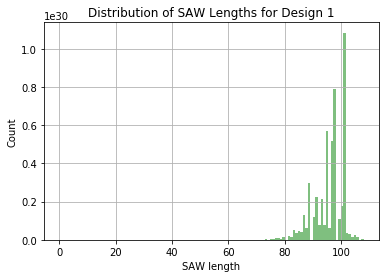

In [315]:
fig = plt.figure()
plt.hist(n_steps1, bins=120, weights=weights1, alpha=0.5, label='Design 1', color='green')
#plt.hist(n_steps2[1:], bins=120, weights=weights2[1:], alpha=0.5, label='Design 2', color='blue')
#plt.hist(n_steps3, bins=120, weights=weights3, alpha=0.5, label='Design 3', color='red')
plt.grid()
plt.xlabel('SAW length')
plt.ylabel('Count')
plt.title('Distribution of SAW Lengths for Design 1')
#plt.legend('Design 1')
fig.savefig('2c_histogram1.png', dpi=300)
plt.show()


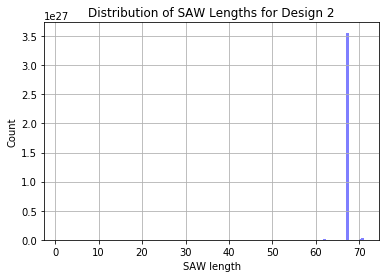

In [316]:
fig = plt.figure()
#plt.hist(n_steps1, bins=120, weights=weights1, alpha=0.5, label='Design 1', color='green')
plt.hist(n_steps2[1:], bins=120, weights=weights2[1:], alpha=0.5, label='Design 2', color='blue')
#plt.hist(n_steps3, bins=120, weights=weights3, alpha=0.5, label='Design 3', color='red')
plt.grid()
plt.xlabel('SAW length')
plt.ylabel('Count')
plt.title('Distribution of SAW Lengths for Design 2')
#plt.legend('Design 2')
fig.savefig('2c_histogram2.png', dpi=300)
plt.show()

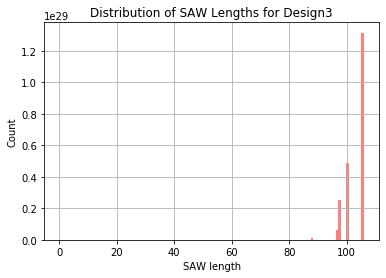

In [317]:
fig = plt.figure()
#plt.hist(n_steps1, bins=120, weights=weights1, alpha=0.5, label='Design 1', color='green')
#plt.hist(n_steps2[1:], bins=120, weights=weights2[1:], alpha=0.5, label='Design 2', color='blue')
plt.hist(n_steps3[1:], bins=120,  weights=weights3[1:], alpha=0.5, label='Design 3', color='red')
plt.grid()
plt.xlabel('SAW length')
plt.ylabel('Count')
plt.title('Distribution of SAW Lengths for Design3')
#plt.legend('Design 3')
fig.savefig('2c_histogram3.png', dpi=300)
plt.show()

## Hit (n,n)

In [201]:
M=10**6
    
path=0

wt_sum=0.

E1_nn = np.empty(M)

deltas = [(1,0), (0,1), (-1,0), (0,-1)]


while (path<M):
   
    x, y = [0], [0] 
    positions = set([(0,0)])
    stuck = 0
    attempts=1
    g_x=1.
    
    while not(stuck):
            
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []
        
        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))
        if deltas_feasible:
            
            direct, probability = getdir_pr(len(deltas_feasible))

            dx, dy = deltas_feasible[direct-1]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
            g_x *= probability 
            
            if (x[-1]==10 and y[-1]==10):
                path+=1
                if(path>=M):
                    break
                wt_sum+=1./g_x/attempts
                E1_nn[path]= wt_sum/path
                break
        else:
            stuck=1
            attempts+=1
    


In [202]:
E1_nn[-1]

1.5787835001893968e+25

## Longest path 1

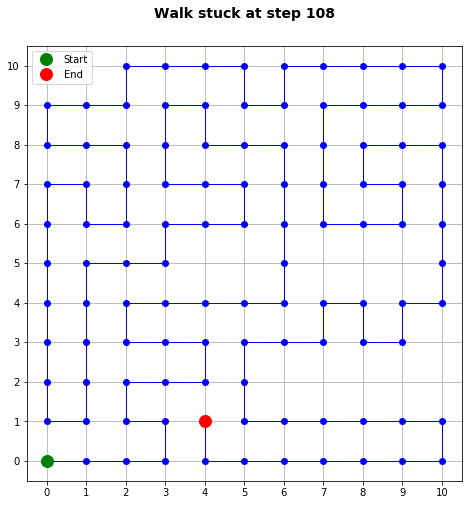

In [282]:
#x, y, stuck, steps = saw_weights()

fig= plt.figure(figsize=(8,8))

ax = fig.gca()
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.plot(longest1_x, longest1_y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(longest1_x[-1], longest1_y[-1], 'ro', ms = 12, label = 'End')
#plt.axis('equal')
plt.legend()
plt.grid()

plt.title('Walk stuck at step ' + str(longest_path1), fontsize=14, fontweight='bold', y = 1.05)

fig.savefig('3_longest1.png', dpi=300)

plt.show()

## Longest path 2

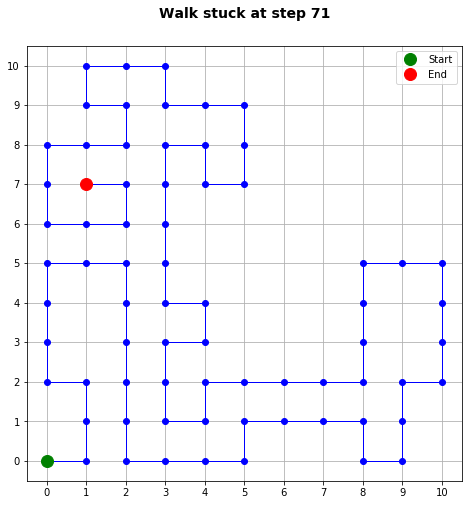

In [320]:
#x, y, stuck, steps = saw_weights()

fig= plt.figure(figsize=(8,8))

ax = fig.gca()
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.plot(longest2_x, longest2_y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(longest2_x[-1], longest2_y[-1], 'ro', ms = 12, label = 'End')
#plt.axis('equal')
plt.legend()
plt.grid()

plt.title('Walk stuck at step ' + str(longest_path2), fontsize=14, fontweight='bold', y = 1.05)

fig.savefig('3_longest2.png', dpi=300)


plt.show()

## Longest path3

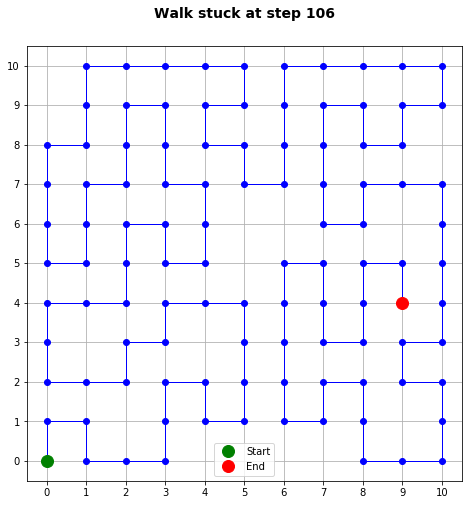

In [318]:

#x, y, stuck, steps = saw_weights()

fig= plt.figure(figsize=(8,8))
#plt.axis([0, 11, 0, 11])

ax = fig.gca()
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.plot(longest3_x, longest3_y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(longest3_x[-1], longest3_y[-1], 'ro', ms = 12, label = 'End')
#plt.axis('equal')
plt.legend()
plt.grid()

plt.title('Walk stuck at step ' + str(longest_path3), fontsize=14, fontweight='bold', y = 1.05)

fig.savefig('3_longest3.png', dpi=300)

plt.show()


In [319]:
len(longest3_x)

106